## CS 7641 Machine Learning
## Assignment 3 Unsupervised Learning and Dimensional Deduction
#### Experiment: Step 2 Dimensionality Reduction
#### Algorithms: PCA, ICA, Randomized Projections, Manifold Learning
#### Data      : AIDS

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

from scipy.stats import kurtosis 

from sklearn.preprocessing import StandardScaler

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import FastICA, PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.random_projection import SparseRandomProjection


from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import InterclusterDistance

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## AIDS Clinical Trials Group Stury 175

In [3]:
#
# data: AIDS Clinical Trials Group Study 175
# source: https://archive.ics.uci.edu/dataset/890/aids+clinical+trials+group+study+175

#
# Start Loading Data
# Using the provided method from UDI ()
# Pakcage Installation needed
# pip install ucimlrepo
# 

from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
aids_clinical_trials_group_study_175 = fetch_ucirepo(id=890) 
  
# data (as pandas dataframes) 
X = aids_clinical_trials_group_study_175.data.features 
y = aids_clinical_trials_group_study_175.data.targets 

#
# End Loading Data
#

In [4]:
y=y.cid

X_raw = X
y_raw = y

In [5]:
print('Kurtosis of normal distribution in y :', kurtosis(y_raw)) 

Kurtosis of normal distribution in y : -0.5724313090021331


## Linear Dimensionality Deduction (Primary Component Analysis: PCA)

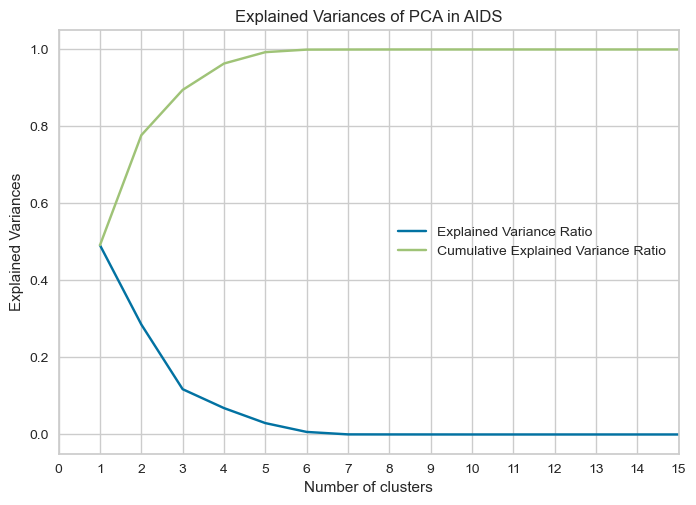

In [6]:
##
## Linear Dimensionality Reduction (PCA)
## sklearn.decomposition.PCA
## https://www.analyticsvidhya.com/blog/2018/08/dimensionality-reduction-techniques-python/
##

pca = PCA().fit(X_raw)

line1, = plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
line2, = plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_))
line1.set_label("Explained Variance Ratio")
line2.set_label("Cumulative Explained Variance Ratio")
plt.legend()

plt.xlabel('Number of clusters')
plt.ylabel('Explained Variances')
plt.xlim(0, 15)
plt.xticks(range(16))
plt.title("Explained Variances of PCA in AIDS")
plt.show()

In [7]:
## 
## set the variables
## 

num_clusters = 3  # the number of clusters
name_dataset = "AIDS"  # the name of the dataset

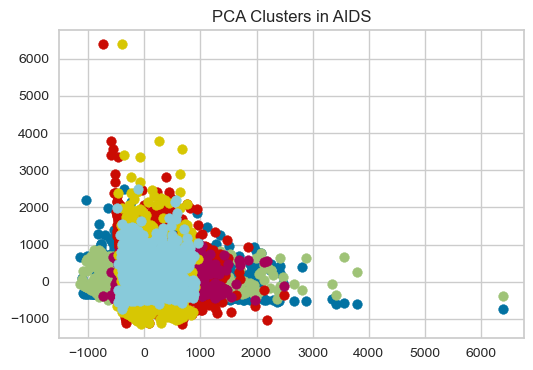

In [10]:
## 
## PCA Graph
## 

model = PCA(n_components = num_clusters)
X_raw_pca = model.fit_transform(X_raw)

plt.figure(figsize=(6, 4))
graph_title = "PCA Clusters in " + name_dataset
plt.title(graph_title)

for i in range(0, num_clusters):
    for j in range(0, num_clusters):
        if i == j:
            continue
        plt.scatter(X_raw_pca[:, i], X_raw_pca[:, j])


In [11]:
## 
## PCA Training Time, Shape Change, and Accuracy
## 

# Training Time
start_time = time.perf_counter()
model = PCA(n_components= num_clusters).fit(X_raw)
training_time = time.perf_counter() - start_time
print("Training Time: ", training_time)

# Shape Change
X_raw_pca = model.transform(X_raw)
print("Original Shape   : ", X_raw.shape)
print("Transformed Shape: ", X_raw_pca.shape)

# Accuracy
X_train, X_test, y_train, y_test = train_test_split(X_raw_pca, y_raw, test_size=0.2)

classifier = DecisionTreeClassifier(max_depth = 20, min_samples_leaf = 3)
cross_score = cross_val_score(classifier, X_train, y_train, cv=5).mean()
print("Cross Validation Score: " + str(cross_score))

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score = accuracy_score(y_test, y_pred)
print("Test Accuracy: " + str(accuracy_score))

Training Time:  0.14367866597604007
Original Shape   :  (2139, 23)
Transformed Shape:  (2139, 3)
Cross Validation Score: 0.7895998499650487
Test Accuracy: 0.8037383177570093


## Linear Dimensionality Deduction (Independent Component Analysis: ICA)

In [18]:
##
## Linear Dimensionality Reduction (ICA)
## sklearn.decomposition.FastICA
##

best_cluster = [0, 0]

for i in range(2, 15):
    model = FastICA(n_components=i, max_iter=10000, tol=0.1).fit(X_raw)
    X_raw_ica = model.fit_transform(X_raw)
    X_train, X_test, y_train, y_test = train_test_split(X_raw_ica, y_raw, test_size=0.2)
    classifier = DecisionTreeClassifier(max_depth = 20, min_samples_leaf = 3)
    cross_score = cross_val_score(classifier, X_train, y_train, cv=5).mean()
    if cross_score > best_cluster[1]:
        best_cluster = [i, cross_score]

print("The Number of Best Cluster: ", best_cluster[0])

The Number of Best Cluster:  13


In [20]:
## 
## set the variables
## 

num_clusters = 13  # the number of clusters
name_dataset = "AIDS"  # the name of the dataset

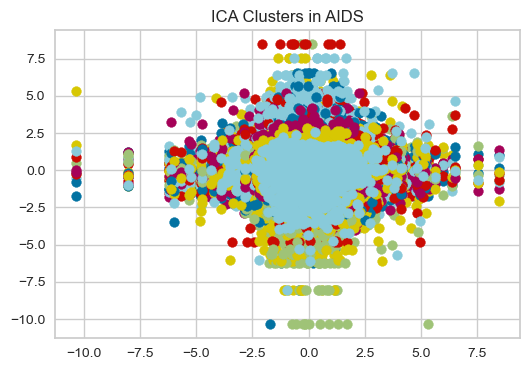

In [21]:
## 
## ICA Graph
## 

model = FastICA(n_components = num_clusters, max_iter=10000, tol=0.1)
X_raw_ica = model.fit_transform(X_raw)

plt.figure(figsize=(6, 4))
graph_title = "ICA Clusters in " + name_dataset
plt.title(graph_title)

for i in range(0, num_clusters):
    for j in range(0, num_clusters):
        if i == j:
            continue
        plt.scatter(X_raw_ica[:, i], X_raw_ica[:, j])

In [22]:
## 
## ICA Training Time, Shape Change, and Accuracy
## 

# Training Time
start_time = time.perf_counter()
model = FastICA(n_components= num_clusters).fit(X_raw)
training_time = time.perf_counter() - start_time
print("Training Time: ", training_time)

# Shape Change
X_raw_ica = model.transform(X_raw)
print("Original Shape   : ", X_raw.shape)
print("Transformed Shape: ", X_raw_ica.shape)

# Accuracy
X_train, X_test, y_train, y_test = train_test_split(X_raw_pca, y_raw, test_size=0.2)

classifier = DecisionTreeClassifier(max_depth = 20, min_samples_leaf = 3)
cross_score = cross_val_score(classifier, X_train, y_train, cv=5).mean()
print("Cross Validation Score: " + str(cross_score))

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score = metrics.accuracy_score(y_test, y_pred)
print("Test Accuracy: " + str(accuracy_score))

Training Time:  0.1657164169009775
Original Shape   :  (2139, 23)
Transformed Shape:  (2139, 13)
Cross Validation Score: 0.799546485260771
Test Accuracy: 0.8387850467289719


## Linear Dimensionality Deduction (Randomized Projections)

In [23]:
##
## Linear Dimensionality Reduction (Randomized Projections)
## sklearn.random_projection.SparseRandomProjection
##

best_cluster = [0, 0]

for i in range(2, 15):
    model = SparseRandomProjection(n_components=i, random_state=0).fit(X_raw)
    X_raw_rp = model.fit_transform(X_raw)
    X_train, X_test, y_train, y_test = train_test_split(X_raw_rp, y_raw, test_size=0.2)
    classifier = DecisionTreeClassifier(max_depth = 20, min_samples_leaf = 3)
    cross_score = cross_val_score(classifier, X_train, y_train, cv=5).mean()
    if cross_score > best_cluster[1]:
        best_cluster = [i, cross_score]

print("The Number of Best Cluster: ", best_cluster[0])

The Number of Best Cluster:  10


In [24]:
## 
## set the variables
## 

num_clusters = 10  # the number of clusters
name_dataset = "AIDS"  # the name of the dataset

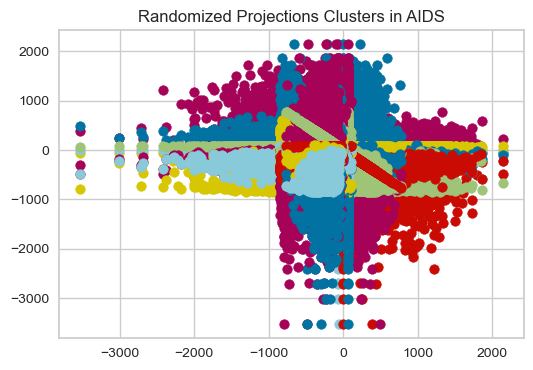

In [26]:
## 
## Randomized Projections Graph
## 

model = SparseRandomProjection(n_components=num_clusters, random_state=0)
X_raw_rp = model.fit_transform(X_raw)

plt.figure(figsize=(6, 4))
graph_title = "Randomized Projections Clusters in " + name_dataset
plt.title(graph_title)

for i in range(0, num_clusters):
    for j in range(0, num_clusters):
        if i == j:
            continue
        plt.scatter(X_raw_rp[:, i], X_raw_rp[:, j])

In [27]:
## 
## RO Training Time, Shape Change, and Accuracy
## 

# Training Time
start_time = time.perf_counter()
model = SparseRandomProjection(n_components=num_clusters, random_state=0).fit(X_raw)
training_time = time.perf_counter() - start_time
print("Training Time: ", training_time)

# Shape Change
X_raw_ica = model.transform(X_raw)
print("Original Shape   : ", X_raw.shape)
print("Transformed Shape: ", X_raw_ica.shape)

# Accuracy
X_train, X_test, y_train, y_test = train_test_split(X_raw_pca, y_raw, test_size=0.2)

classifier = DecisionTreeClassifier(max_depth = 20, min_samples_leaf = 3)
cross_score = cross_val_score(classifier, X_train, y_train, cv=5).mean()
print("Cross Validation Score: " + str(cross_score))

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score = metrics.accuracy_score(y_test, y_pred)
print("Test Accuracy: " + str(accuracy_score))

Training Time:  0.00579004199244082
Original Shape   :  (2139, 23)
Transformed Shape:  (2139, 10)
Cross Validation Score: 0.7966088691115544
Test Accuracy: 0.8247663551401869


## Non-linear Dimensionality Deduction (TruncatedSVD)

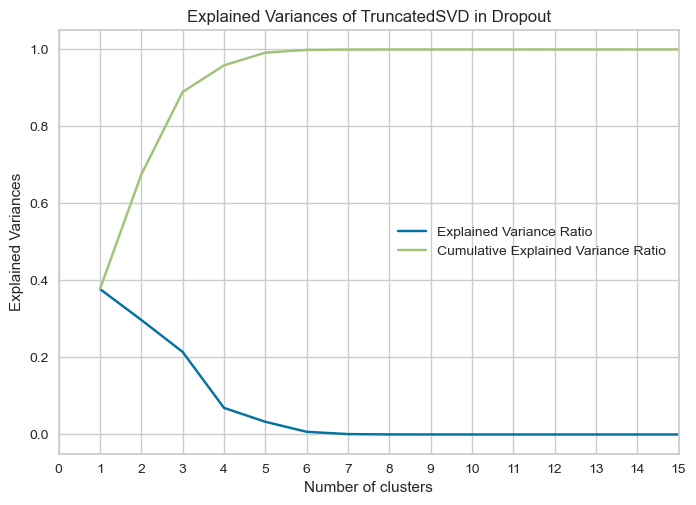

In [28]:
##
## Non-linear Dimensionality Reduction (TruncatedSVD)
## sklearn.decomposition.TruncatedSVD
## https://www.analyticsvidhya.com/blog/2018/08/dimensionality-reduction-techniques-python/
##

num_component = X_raw.shape[1] -1
truncsvd = TruncatedSVD(n_components=num_component).fit(X_raw)

line1, = plt.plot(range(1, len(truncsvd.explained_variance_ratio_) + 1), truncsvd.explained_variance_ratio_)
line2, = plt.plot(range(1, len(truncsvd.explained_variance_ratio_) + 1), np.cumsum(truncsvd.explained_variance_ratio_))
line1.set_label("Explained Variance Ratio")
line2.set_label("Cumulative Explained Variance Ratio")
plt.legend()

plt.xlabel('Number of clusters')
plt.ylabel('Explained Variances')
plt.xlim(0, 15)
plt.xticks(range(16))
plt.title("Explained Variances of TruncatedSVD in Dropout")
plt.show()

In [29]:
## 
## set the variables
## 

num_clusters = 4  # the number of clusters
name_dataset = "Dropout"  # the name of the dataset

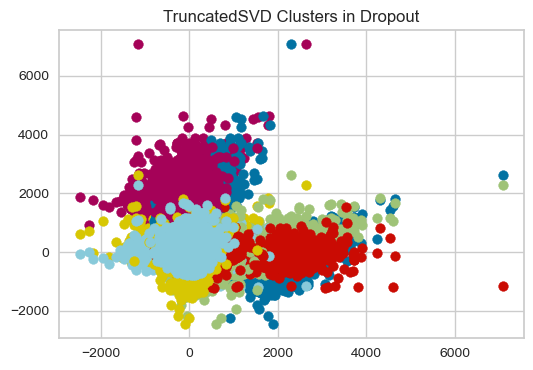

In [31]:
## 
## TruncatedSVD Graph
## 

model = TruncatedSVD(n_components=num_clusters)
X_raw_truncsvd = model.fit_transform(X_raw)

plt.figure(figsize=(6, 4))
graph_title = "TruncatedSVD Clusters in " + name_dataset
plt.title(graph_title)

for i in range(0, num_clusters):
    for j in range(0, num_clusters):
        if i == j:
            continue
        plt.scatter(X_raw_truncsvd[:, i], X_raw_truncsvd[:, j])


In [32]:
## 
## TruncatedSVD Training Time, Shape Change, and Accuracy
## 

# Training Time
start_time = time.perf_counter()
model = TruncatedSVD(n_components=num_clusters).fit(X_raw)
training_time = time.perf_counter() - start_time
print("Training Time: ", training_time)

# Shape Change
X_raw_ica = model.transform(X_raw)
print("Original Shape   : ", X_raw.shape)
print("Transformed Shape: ", X_raw_ica.shape)

# Accuracy
X_train, X_test, y_train, y_test = train_test_split(X_raw_pca, y_raw, test_size=0.2)

classifier = DecisionTreeClassifier(max_depth = 20, min_samples_leaf = 3)
cross_score = cross_val_score(classifier, X_train, y_train, cv=5).mean()
print("Cross Validation Score: " + str(cross_score))

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score = metrics.accuracy_score(y_test, y_pred)
print("Test Accuracy: " + str(accuracy_score))

Training Time:  0.09655429096892476
Original Shape   :  (2139, 23)
Transformed Shape:  (2139, 4)
Cross Validation Score: 0.8030330929364226
Test Accuracy: 0.8271028037383178
